# データシステムの知能化とデザイン
# 第5回課題
## 62106550　木村勇翔

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [4]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
wine_cat = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),
                      pd.DataFrame(wine.target, columns=['class'])], axis=1)
wine_cat.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
wine_cat.drop(wine_cat[wine_cat['class'] == 2].index, inplace=True)

In [8]:
wine_data = wine_cat.values[:,:13]
wine_target = wine_cat.values[:,13]
print(wine_data, len(wine_data))
print(wine_target, len(wine_target))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.179e+01 2.130e+00 2.780e+00 ... 9.700e-01 2.440e+00 4.660e+02]
 [1.237e+01 1.630e+00 2.300e+00 ... 8.900e-01 2.780e+00 3.420e+02]
 [1.204e+01 4.300e+00 2.380e+00 ... 7.900e-01 2.570e+00 5.800e+02]] 130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 130


In [9]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(wine_data, wine_target, test_size=0.25)

In [10]:
Train_X.shape, Test_X.shape

((97, 13), (33, 13))

In [11]:
train_X = torch.FloatTensor(Train_X)
train_Y = torch.LongTensor(Train_Y)
test_X = torch.FloatTensor(Test_X)
test_Y = torch.LongTensor(Test_Y)

In [12]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

(torch.Size([97, 13]),
 torch.Size([33, 13]),
 torch.Size([97]),
 torch.Size([33]))

In [13]:
train = TensorDataset(train_X, train_Y)

In [14]:
train[0], len(train)

((tensor([1.3860e+01, 1.5100e+00, 2.6700e+00, 2.5000e+01, 8.6000e+01, 2.9500e+00,
          2.8600e+00, 2.1000e-01, 1.8700e+00, 3.3800e+00, 1.3600e+00, 3.1600e+00,
          4.1000e+02]),
  tensor(1)),
 97)

In [15]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

In [16]:
class Net(nn.Module):
  def __init__(self): #(1)
    super(Net, self).__init__() #(2)
    self.fc1 = nn.Linear(13, 128) #(3)
    self.fc2 = nn.Linear(128, 2) #(4)
  def forward(self, x): #(5)
    x = F.relu(self.fc1(x)) #(6)
    x = self.fc2(x) #(7)
    return x #(8)

In [17]:
model = Net()

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [19]:
for epoch in range(300):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
  if(epoch+1)%10 == 0: #(9)
    print(epoch+1, total_loss)

10 tensor(2.2593)
20 tensor(1.1988)
30 tensor(1.7213)
40 tensor(1.7346)
50 tensor(1.3745)
60 tensor(2.5020)
70 tensor(1.7116)
80 tensor(1.4542)
90 tensor(1.3844)
100 tensor(1.5602)
110 tensor(1.7456)
120 tensor(1.3236)
130 tensor(1.4308)
140 tensor(1.4758)
150 tensor(1.6493)
160 tensor(1.5351)
170 tensor(1.4781)
180 tensor(1.1269)
190 tensor(1.6600)
200 tensor(1.4373)
210 tensor(1.6419)
220 tensor(1.4703)
230 tensor(1.1800)
240 tensor(1.1950)
250 tensor(2.0669)
260 tensor(1.2870)
270 tensor(1.0957)
280 tensor(1.4625)
290 tensor(1.6644)
300 tensor(1.6147)


In [20]:
test_model = model(test_X).detach()
torch.max(test_model, 1)

torch.return_types.max(
values=tensor([3.9789, 4.0892, 3.6249, 2.8290, 6.5703, 3.2959, 3.6308, 3.9782, 4.5915,
        4.9446, 4.6565, 4.1568, 3.5635, 4.8780, 2.9523, 5.2815, 2.5446, 3.7303,
        2.5556, 2.3095, 3.6663, 4.5010, 3.5929, 3.4361, 4.7557, 3.4268, 4.3292,
        3.3168, 3.3722, 3.6083, 2.6133, 6.4188, 5.0001]),
indices=tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0]))

In [21]:
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.7878787878787878

In [22]:
import numpy as np
from tqdm import tqdm

In [23]:
import matplotlib.pyplot as plt

> ## 改良1. Learning Rateを小さくするとどうなるか (SGDとAdamの比較)

In [24]:
lr_list = np.logspace(-10,0,num=10,base=10)

ac_num_list_s = np.zeros(len(lr_list))
for i in range(10):
  ac_score_list = []
  for lr in tqdm(lr_list):
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(300):
      total_loss = 0 #(1)
      for train_x, train_y in train_loader: #(2)
        optimizer.zero_grad() #(3)
        output = model(train_x) #(4)
        loss = criterion(output, train_y) #(5)
        loss.backward() #(6)
        optimizer.step() #(7)
        total_loss += loss.data #(8)
    test_model = model(test_X).detach()
    torch.max(test_model, 1)
    result = torch.max(test_model, 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
    ac_score_list.append(accuracy)
  ac_score_list = np.array(ac_score_list)
  ac_num_list_s = ac_num_list_s + ac_score_list
ac_num_list_s = ac_num_list_s/10



ac_num_list_a = np.zeros(len(lr_list))
for i in range(10):
  ac_score_list = []
  for lr in tqdm(lr_list):
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(300):
      total_loss = 0 #(1)
      for train_x, train_y in train_loader: #(2)
        optimizer.zero_grad() #(3)
        output = model(train_x) #(4)
        loss = criterion(output, train_y) #(5)
        loss.backward() #(6)
        optimizer.step() #(7)
        total_loss += loss.data #(8)
    test_model = model(test_X).detach()
    torch.max(test_model, 1)
    result = torch.max(test_model, 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
    ac_score_list.append(accuracy)
  ac_score_list = np.array(ac_score_list)
  ac_num_list_a = ac_num_list_a + ac_score_list
ac_num_list_a = ac_num_list_a/10

100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


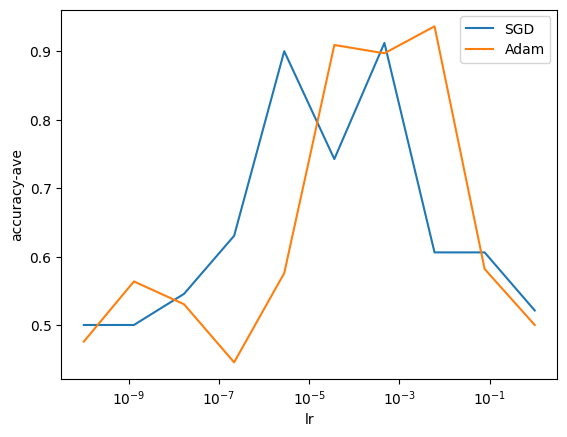

In [25]:
plt.plot(lr_list, ac_num_list_s,label='SGD')
plt.plot(lr_list, ac_num_list_a,label='Adam')
plt.xlabel('lr')
plt.ylabel('accuracy-ave')
plt.xscale('log')
plt.legend()
plt.show()

Learning Rateを0.001程度にするのが一番accuracyが高かった。大きすぎると勾配爆発し、小さすぎると学習が進まないことが確認できた。また、SGDよりもAdamの方がlr=0.001程度で高いaccuracyを示すことが確認できた。

> ## 改良2.ネットワークの構造を改良
(1)Learning Rateを変更。$$lr =  5.0\times10^{-4}$$  
(2)optimizerをSGDからAdamに変更。  
(3)ネットワーク構造を変更。隠れ層を深くし、全結合層を5層に増やした。  
(4)全結合層と活性化関数(ReLU関数)の間にバッチノーマライゼーションを施した。正規化を行うことで学習が適切に進むことを狙った。

In [26]:
# モデルを再定義
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)
    self.bn = nn.BatchNorm1d(128)
  def forward(self, x):
    x = F.relu(self.bn(self.fc1(x)))
    x = F.relu(self.bn(self.fc2(x)))
    x = F.relu(self.bn(self.fc3(x)))
    x = F.relu(self.bn(self.fc4(x)))
    x = F.relu(self.bn(self.fc5(x)))
    x = self.fc6(x)
    return x

In [27]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
for epoch in range(300):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
test_model = model(test_X).detach()
# test_model
torch.max(test_model, 1)
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

1.0

### 精度100%を実現できた。

In [28]:
model = Net()
record_train = []
record_valid = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
for epoch in range(300):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
  record_train.append(total_loss/len(train_loader))
  with torch.no_grad():
    test_model = model(test_X)
    valid_loss = criterion(test_model, test_Y)
    # test_model
    result = torch.max(test_model.detach(), 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
  record_valid.append(valid_loss)

学習過程の可視化

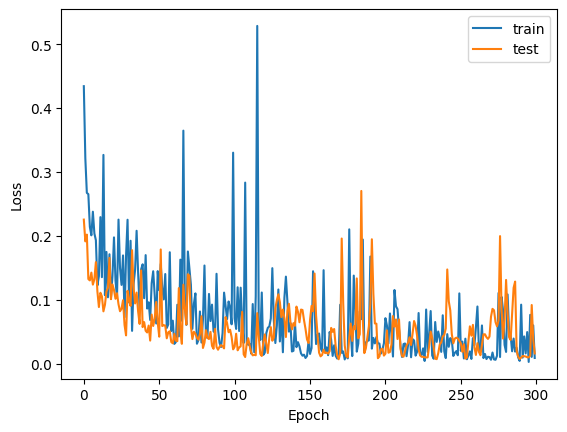

In [29]:
plt.plot(np.arange(300),record_train,label='train')
plt.plot(np.arange(300),record_valid,label='test')
# plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

学習過程を確認するとLossはepochによりノイズはあるが、適切に収束しており過学習は確認されない。安定的に精度100%を実現するためには複数のmodelを作成し、最終的に多数決で決めること、lrや層数などのハイパーパラメータをサーチすることが効果的であると考える。